<a href="https://colab.research.google.com/github/tracyhua2/DS3001/blob/main/Final%20Project/DS3001_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install kmodes

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.metrics import accuracy_score, f1_score

In [14]:
url = "https://raw.githubusercontent.com/tracyhua2/DS3001/refs/heads/main/Data/encoded_data.csv"
df = pd.read_csv(url)
df.head()

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Gender,Employment_1,Employment_4,Race_2,Race_3,Race_4,Race_5
0,3,2,4.0,3.0,3.0,0,0,0,0,1,1.0,0.0,2,0,0,0,0,0,0
1,2,2,4.0,2.0,3.0,1,0,0,1,0,0.0,0.0,1,0,0,0,0,0,0
2,3,2,3.0,2.0,3.0,0,0,0,0,1,0.0,0.0,1,0,0,0,0,1,0
3,1,2,3.0,2.0,3.0,0,0,0,1,0,0.0,0.0,2,0,0,0,0,1,0
4,3,2,3.0,3.0,3.0,1,0,0,0,0,1.0,0.0,2,0,0,0,0,0,0


In [15]:
# response variable is 'Number of Doctors Visited'
X = df.drop('Number of Doctors Visited', axis=1)
y = df['Number of Doctors Visited']

In [16]:
# # elbow plot for k modes cost
# costs = []
# K = range(1, 11)
# for k in K:
#     km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
#     km.fit(df)
#     costs.append(km.cost_)

# plt.plot(K, costs, '-o')
# plt.xlabel('k')
# plt.ylabel('KModes cost')
# plt.title('Elbow Method for KModes')
# plt.show()

In [17]:
# running cluster centroids using Kmodes with k = 3
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(df)

df['cluster'] = clusters
df.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 212, cost: 2980.0
Run 1, iteration: 2/100, moves: 29, cost: 2980.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 216, cost: 2879.0
Run 2, iteration: 2/100, moves: 73, cost: 2879.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 189, cost: 2959.0
Run 3, iteration: 2/100, moves: 0, cost: 2959.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 91, cost: 2988.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 272, cost: 2848.0
Run 5, iteration: 2/100, moves: 38, cost: 2848.0
Best run was number 5


,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Gender,Employment_1,Employment_4,Race_2,Race_3,Race_4,Race_5,cluster
0,3,2,4.0,3.0,3.0,0,0,0,0,1,1.0,0.0,2,0,0,0,0,0,0,2
1,2,2,4.0,2.0,3.0,1,0,0,1,0,0.0,0.0,1,0,0,0,0,0,0,0
2,3,2,3.0,2.0,3.0,0,0,0,0,1,0.0,0.0,1,0,0,0,0,1,0,2
3,1,2,3.0,2.0,3.0,0,0,0,1,0,0.0,0.0,2,0,0,0,0,1,0,2
4,3,2,3.0,3.0,3.0,1,0,0,0,0,1.0,0.0,2,0,0,0,0,0,0,1


In [18]:
cluster_sizes = df['cluster'].value_counts()
cluster_sizes

,count
cluster,
0,310
2,228
1,176


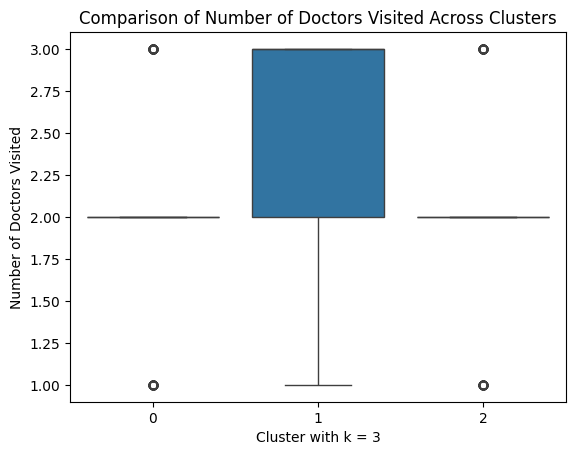

In [19]:
# comparison of clusters for response variable fpr k = 3
sns.boxplot(x='cluster', y='Number of Doctors Visited', data=df)
plt.xlabel('Cluster with k = 3')
plt.title(f'Comparison of Number of Doctors Visited Across Clusters')
plt.show()

In [20]:
import pandas as pd

# 1) compute medians (cluster becomes the index)
median_by_cluster = df.groupby('cluster').median()

# 2) display it (in a Jupyter notebook this will render as a table)
display(median_by_cluster)


,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Gender,Employment_1,Employment_4,Race_2,Race_3,Race_4,Race_5
cluster,,,,,,,,,,,,,,,,,,,
0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,3.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# calculating accuracy and f1 score
cluster_to_label = {}
for c in df['cluster'].unique():
    most_common = df.loc[df['cluster']==c, 'Number of Doctors Visited'] \
                    .mode().iloc[0]
    cluster_to_label[c] = most_common

y_pred = df['cluster'].map(cluster_to_label)

acc = accuracy_score(df['Number of Doctors Visited'], y_pred)
f1 = f1_score(df['Number of Doctors Visited'], y_pred, average='weighted')

print(f"Accuracy: {acc:.3f}")
print(f"Weighted F1: {f1:.3f}")

Accuracy: 0.571
Weighted F1: 0.502
